# Empezando a ver los datos

- Cuando vemos los datos hay dos archivos de datos (envios y ventas) y un csv (pos) con los dat. 
- El csv contiene información de los puntos de venta (Point of Sale o POS). Es un archivo algo confuso si uno lo mira por primera vez (con openoffice por ejemplo). Por ejemplo en la columna 'id_pos' hay valores negativos que se repiten varias veces y algunas filas sin valores.
- Para ver qué cosas importan de aquí vamos a observar cuáles son los valores de 'id_pos' que aparecen.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#Definir directorio de datos
DATA_PATH = '/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Data/'

#Definir nombres de archivos de datos
ENVIOS_DAT = 'Envios.dat'
VENTAS_DAT = 'Ventas.dat'
POS_DAT = 'pos.csv'

#Leer archivos de datos
envios = pd.read_csv(DATA_PATH+ENVIOS_DAT,header=0,delimiter='|',parse_dates=['fecha'])  
ventas = pd.read_csv(DATA_PATH+VENTAS_DAT,header=0,delimiter='|',parse_dates=['fecha'])
pos = pd.read_csv(DATA_PATH+POS_DAT,index_col=0)

In [3]:
#Elementos únicos de 'id_pos' en envios y ventas
envios_unique = np.unique(envios['id_pos'].values)
ventas_unique = np.unique(ventas['id_pos'].values)

#Cantidad de elementos únicos en envios y ventas
num_envios_unique = envios_unique.shape[0]
num_ventas_unique = ventas_unique.shape[0]

print('envios_unique: {} shape: {}'.format(envios_unique,num_envios_unique))
print('ventas_unique: {} shape: {}'.format(ventas_unique,num_ventas_unique))
print('diferencia: {}'.format(num_envios_unique-num_ventas_unique))

envios_unique: [ 3142  3143  3144 ..., 58808 58817 63432] shape: 13449
ventas_unique: [ 3142  3143  3144 ..., 58808 58817 63432] shape: 12302
diferencia: 1147


Vemos que en envios hay mas POS que en ventas. Eso significa que en algunos lugares no hubo ventas

In [4]:
#Tener cuáles son los POS que no estan (diferencia de conjuntos)
diff_set = set(envios_unique)-set(ventas_unique)

#Transformar en lista
diff_list = list(diff_set)

print('cantidad: {}'.format(len(diff_list)))


cantidad: 1149


¡Esto es raro! Al hacer esto obtengo que hay dos mas de diferencia respecto lo que se haía visto antes...

Pero esto podría ocurrir si $C=A-B$ y el conjunto $B$ tiene elementos que no están en $A$.

Vamos a ver qué elementos son.

In [5]:
for element in ventas_unique:
    if not(element in envios_unique):
        print('{} no está en envios'.format(element))
        
#Tomemos el conjunto de todos los POS que aparecen en ventas y envios
all_pos = set(list(envios_unique)+list(ventas_unique))

print('Cantidad de POS que aparecen en ventas y envios: {}'.format(len(list(all_pos))))

8918 no está en envios
17644 no está en envios
Cantidad de POS que aparecen en ventas y envios: 13451


Quizás cuando juntaron los datos, les llegó datos de ventas y se olvidaron de los envíos.

En principio hay que trabajar trabajar con los comercios que tienen registro de envios y de ventas. 

En el archivo de ejemplo de respuesta figuran 'id_pos' que no están en envios y ventas. Voy a interpretar que fue solo a modo ilustrativo.

En el csv que describe los POS hay unos campos que son proporciones etarias de la población cercana a cada POS. Me gustaría chequear que suman a 100% sólo para estar seguro (o que al menos no se pasan del 100%).

Veamos los envíos por día. Si hay mas de uno.



In [7]:
print('envios: {}'.format(np.unique(envios['cantidad_envios'].values)))

envios: [1 2]


Hay como máximo en la lista de envios, 2 envios por día.

Veamos la progresión de cantidad de envíos y ventas en función del tiempo. Primero vamos a ver entre qué fechas están comprendidos los datos.

In [8]:
envios_start_date = np.min((envios['fecha'].values))
envios_end_date = np.max(envios['fecha'].values)
ventas_start_date = np.min(ventas['fecha'].values)
ventas_end_date = np.max(ventas['fecha'].values)

print('fechas de envios: desde {} a {}'.format(envios_start_date,envios_end_date))
print('fechas de ventas: desde {} a {}'.format(ventas_start_date,ventas_end_date))


dates_envios = np.unique(envios['fecha'].values)
#print(dates_envios)

dates_ventas = np.unique(ventas['fecha'].values)
#print(dates_ventas)


fechas de envios: desde 2012-08-17T00:00:00.000000000 a 2014-11-29T00:00:00.000000000
fechas de ventas: desde 2012-10-01T00:00:00.000000000 a 2014-11-30T00:00:00.000000000


Recuérdese que se quiere predecir las ventas en Diciembre de 2014. Los datos llegan hasta Noviembre de 2014.
Ahora sí veamos los envíos y compras en función del tiempo.

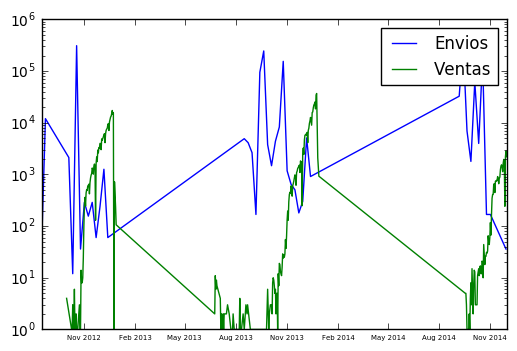

In [8]:
import matplotlib.pyplot as plt

#Para cada día sumo los envios
dates_sum_envios = np.array([envios[envios['fecha']==i]['unidades_despachadas'].values.sum() for i in dates_envios])

#Para cada día sumo las ventas
dates_sum_ventas = np.array([ventas[ventas['fecha']==i]['unidades'].values.sum() for i in dates_ventas])




plt.figure()
plt.plot(dates_envios,dates_sum_envios,label='Envios')
plt.plot(dates_ventas,dates_sum_ventas,label='Ventas')
plt.tick_params(axis='x',labelsize=5)
plt.yscale('log')
plt.legend()

#plt.plot()
plt.show()

Me gustaría ver qué significa el 'cantidad_envios' en los datos de envíos, echemos un vistazo

In [9]:
print(envios[envios['cantidad_envios']==2])

           fecha  id_pos  unidades_despachadas  cantidad_envios
1043  2012-10-19    3201                    84                2
13292 2013-09-20    3201                    72                2
13631 2013-09-20    3641                   108                2
29571 2014-09-13    3641                    60                2
30047 2014-09-13    3201                    84                2
34214 2014-10-04    3667                   120                2
34275 2014-10-04    3725                   204                2


Me parece que 'cantidad_envios' es irrelevante, se nota que hay más unidades despachadas, pero debe ser justamente el efecto que mandaron dos veces. En definitiva, 'unidades_despachadas' es la suma de todos los envíos del día.

Vamos a visualizar en lugar por día, por semana y comparemos los distintos años

In [10]:
#Fechas de envíos y ventas codificados por semanas del año y año
dates_week_envios = np.unique(pd.Series(dates_envios).dt.strftime('%Y-%W').values)
dates_week_ventas = np.unique(pd.Series(dates_ventas).dt.strftime('%Y-%W').values)

print('dates_week_envios.shape: {}'.format(dates_week_envios.shape))
print('dates_week_ventas.shape: {}'.format(dates_week_ventas.shape))

#Para cada semana calculo la suma de los envios y las ventas
dates_week_sum_envios = np.array([envios[envios['fecha'].dt.strftime('%Y-%W').values==i]['unidades_despachadas'].values.sum() for i in dates_week_envios]) 
print('dates_week_sum_envios.shape: {}'.format(dates_week_sum_envios.shape))

dates_week_sum_ventas = np.array([ventas[ventas['fecha'].dt.strftime('%Y-%W').values==i]['unidades'].values.sum() for i in dates_week_ventas]) 
print('dates_week_sum_ventas.shape: {}'.format(dates_week_sum_ventas.shape))




dates_week_envios.shape: (41,)
dates_week_ventas.shape: (48,)
dates_week_sum_envios.shape: (41,)
dates_week_sum_ventas.shape: (48,)


In [11]:
#En dates_week_envios y dates_week_ventas tenemos strings en formato 'año-semana'. Necesito llevarlo a 
#números. 
#Vamos a contar desde la semana 1 del 2012
import re

weeks_envios = np.array([(int(re.split('-',dates_week_envios[i])[0])-2012)*52 +\
                int(re.split('-',dates_week_envios[i])[1]) for i in range(dates_week_envios.shape[0])])

weeks_ventas = np.array([(int(re.split('-',dates_week_ventas[i])[0])-2012)*52 +\
                int(re.split('-',dates_week_ventas[i])[1]) for i in range(dates_week_ventas.shape[0])])


print(weeks_envios.shape)
print(weeks_ventas.shape)

(41,)
(48,)


También me interesa tener las fechas codificadas por mes

In [12]:
#Fechas de envíos y ventas codificados por mes y año
dates_month_envios = np.unique(pd.Series(dates_envios).dt.strftime('%Y-%m').values)
dates_month_ventas = np.unique(pd.Series(dates_ventas).dt.strftime('%Y-%m').values)

print(dates_month_envios.shape)
print(dates_month_ventas.shape)

#Para cada mes calculo la suma de los envios y las ventas
dates_month_sum_envios = np.array([envios[envios['fecha'].dt.strftime('%Y-%m').values==i]['unidades_despachadas'].values.sum() for i in dates_month_envios]) 
print('dates_month_sum_envios.shape: {}'.format(dates_month_sum_envios.shape))

dates_month_sum_ventas = np.array([ventas[ventas['fecha'].dt.strftime('%Y-%m').values==i]['unidades'].values.sum() for i in dates_month_ventas]) 
print('dates_month_sum_ventas.shape: {}'.format(dates_month_sum_ventas.shape))




(12,)
(13,)
dates_month_sum_envios.shape: (12,)
dates_month_sum_ventas.shape: (13,)


(12,)
(13,)


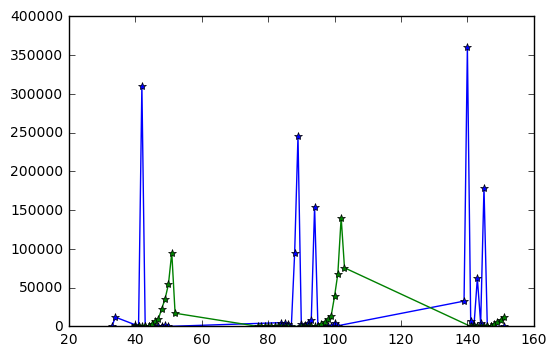

In [15]:
month_envios = np.array([(int(re.split('-',dates_month_envios[i])[0])-2012)*12 +\
                int(re.split('-',dates_month_envios[i])[1]) for i in range(dates_month_envios.shape[0])])

month_ventas = np.array([(int(re.split('-',dates_month_ventas[i])[0])-2012)*12 +\
                int(re.split('-',dates_month_ventas[i])[1]) for i in range(dates_month_ventas.shape[0])])


print(month_envios.shape)
print(month_ventas.shape)

plt.figure()
plt.plot(weeks_envios,dates_week_sum_envios,'-*')
plt.plot(weeks_ventas,dates_week_sum_ventas,'-*')
plt.show()



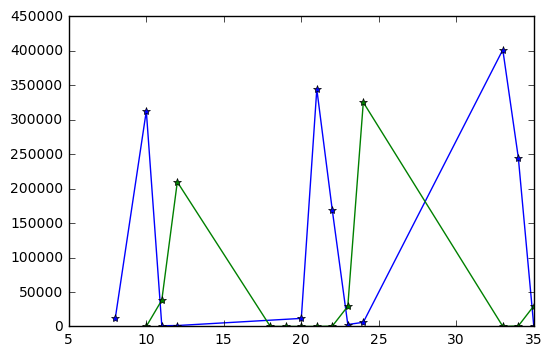

In [16]:
plt.figure()
plt.plot(month_envios,dates_month_sum_envios,'-*')
plt.plot(month_ventas,dates_month_sum_ventas,'-*')
plt.show()



In [6]:
#Sanity check: ver si todos los POS tienen datos
all_pos_list = list(all_pos)

with_data = []

for i in pos.index.values:
    try:
        with_data.append(int(i))
    except ValueError:
        continue
#print(int(pos.index.values[::100]))
#print([pos.loc[str(all_pos[i])][4:22].values.sum() for i in range(len(all_pos)) ])
#sum_age_pct = [pos.loc[i][4:22].values.sum() for i in all_pos]

#print(pos.loc[str(all_pos[0])][4:22].values.sum())
no_data = all_pos-set(with_data)
print('Cantidad de POS sin datos: {}'.format(len(list(no_data))))
#print(all_pos-set(aa))



Cantidad de POS sin datos: 684


Bueno, acá hay otra inconsistencia encontrada: hay POS que aparecen en los registros de ventas y envios de los cuales no hay datos de entorno!!

In [7]:
#Me quedo con los POS que tienen datos
pos_with_data = all_pos - no_data

pos_with_data_list = list(pos_with_data)

print(len(all_pos_list))
print(len(pos_with_data_list))

13451
12767


In [19]:
#print([pos.loc[str(all_pos[i])][4:22].values.sum() for i in range(len(all_pos)) ])
sum_age_pct = [pos.loc[str(i)][4:22].values.sum() for i in pos_with_data_list]

In [11]:
print(np.where( np.isnan(sum_age_pct)==True))
print(pos_with_data_list[12506])
#plt.figure()
#plt.hist(np.array(sum_age_pct),bins=100)
#plt.show()

NameError: name 'sum_age_pct' is not defined

Quiero después verificar si el canal (en los datos de venta) son unívocos con el 'id_pos', en tal caso puedo rescatar esta información para usarla como feature categórica.

También veo que hay algunas entradas faltantes en los campos de porcentajes etarios. Va a ser importante tener estos datos faltantes en cuenta.

# Primeros modelos
## Modelo sin aprendizaje

- Vamos a intentar un modelo "línea de base" (sin aprendizaje), para comparar con modelos sucesivos más complejos y con aprendizaje.

Un modelo básico que se puede intentar es predecir que las ventas en diciembre de 2014 como las de diciembre de 2013 para cada POS (Razonamiento marplatense). O incluso como un promedio de las de diciembre de 2012 y 2013 (Razonamiento marplatense promedio).

In [8]:
#Obtengamos para cada POS cuánto se vendió en diciembre de 2012 y 2013. 
#Vamos a basarnos en la lista all_pos_list (la que reúne los POS de envíos y ventas)
#El modelo de respuesta sugiere que hay una lista de POS 
ANSWER_PATH = '/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/ejemploRespuesta.csv'
answer_model = pd.read_csv(ANSWER_PATH,index_col=0,header=None)

answer_POS = answer_model.index.values

print(answer_POS)
print(len(answer_POS))


[   288    953   1004 ..., 129492 129746 131072]
12897


In [9]:
print(len(answer_POS))

filter_dic_2013 = ventas['fecha'].dt.strftime('%Y-%m').values=='2013-12' 

ventas_dic_2013 = np.array([ventas[filter_dic_2013 & (ventas['id_pos']==i)]\
['unidades'].values.sum() for i in answer_POS])

print(ventas_dic_2013)

12897
[0 0 0 ... 0 0 0]


### Save

In [11]:
np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_dic_2013.npy',filter_dic_2013)
np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_dic_2013.npy',ventas_dic_2013)

### Load

In [9]:
filter_dic_2013 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_dic_2013.npy')
ventas_dic_2013 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_dic_2013.npy')

In [13]:
filter_dic_2012 = ventas['fecha'].dt.strftime('%Y-%m').values=='2012-12' 

ventas_dic_2012 = np.array([ventas[filter_dic_2012 & (ventas['id_pos']==i)]\
['unidades'].values.sum() for i in answer_POS])

print(np.unique(ventas_dic_2012))

print(ventas_dic_2012.shape)

#SAVE
np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_dic_2012.npy',filter_dic_2012)
np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_dic_2012.npy',ventas_dic_2012)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 110 111 112 113 114 115 116 117 118 119 120 121 122 124 125 126 127
 128 129 131 132 134 139 140 141 143 144 148 149 150 151 154 156 164 168
 171 173]
(12897,)


### Load

In [10]:
filter_dic_2012 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_dic_2012.npy')
ventas_dic_2012 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_dic_2012.npy')

In [38]:
#Predecir con diciembre de 2013
pd.DataFrame(ventas_dic_2013,answer_POS)\
.to_csv('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Answers/v0_0.csv',header=False)

print(ventas_dic_2013.shape,answer_POS.shape)
print('Ventas totales en 2013: {}'.format(ventas_dic_2013.sum()))

#Predecir con diciembre de 2012
pd.DataFrame(ventas_dic_2012,answer_POS)\
.to_csv('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Answers/v0_1.csv',header=False)

print(ventas_dic_2012.shape,answer_POS.shape)
print('Ventas totales en 2012: {}'.format(ventas_dic_2012.sum()))

#Predecir con el promedio de diciembre de 2013 y diciembre de 2012
pd.DataFrame(np.round((ventas_dic_2012+ventas_dic_2013)/2).astype(int),answer_POS)\
.to_csv('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Answers/v0_2.csv',header=False)

print(ventas_dic_2012.shape,answer_POS.shape)
print('Ventas totales (promedio de 2012 y 2013): {}'.format(np.round((ventas_dic_2012+ventas_dic_2013)/2).astype(int).sum()))

#Predecir con la tendencia lineal de diciembre de 2012 a diciembre de 2013
lnt_2012_2013 = np.round((2*ventas_dic_2013-ventas_dic_2012)/2).astype(int)
lnt_2012_2013[lnt_2012_2013 < 0]  = 0
pd.DataFrame(lnt_2012_2013,answer_POS)\
.to_csv('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Answers/v0_3.csv',header=False)


print(lnt_2012_2013.shape,answer_POS.shape)
print('Ventas totales (tendencia lineal con 2012 y 2013): {}'.format(lnt_2012_2013.sum()))


(12897,) (12897,)
Ventas totales en 2013: 313707
(12897,) (12897,)
Ventas totales en 2012: 202392
(12897,) (12897,)
Ventas totales (promedio de 2012 y 2013): 258226
(12897,) (12897,)
Ventas totales (tendencia lineal con 2012 y 2013): 215431


MAE: 12.921221989609986
MAE std: 14.989955442668116
Max: 202


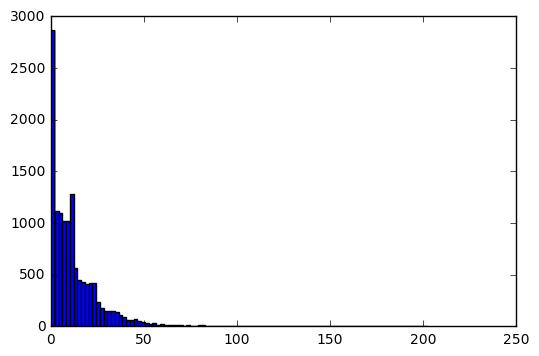

In [25]:
#Calcular el MAE suponiendo que diciembre de 2012 es lo predicho y diciembre de 2013 test:

print('MAE: {}'.format((np.abs(ventas_dic_2012-ventas_dic_2013)).mean()))
print('MAE std: {}'.format((np.abs(ventas_dic_2012-ventas_dic_2013)).std()))
print('Max: {}'.format((np.abs(ventas_dic_2012-ventas_dic_2013)).max()))
plt.figure()
plt.hist(np.abs(ventas_dic_2012-ventas_dic_2013),bins=100)
plt.show()





El puntaje visible fue de 12.56177 haciendo la predicción como diciembre de 2013.

El puntaje visible fue de 11.16819 haciendo la predicción como diciembre de 2012.

El puntaje visible fue de 10.39745 haciendo la predicción como el promedio de diciembre de 2012 y 2013.

El puntaje visible fue de 15.32320 haciendo la predicción como la tendencia lineal de 2012 y 2013.



## Modelo lineal

Podemos ver cuál es la relación entre las ventas en diciembre para un mismo POS con otras variables: 
- Ventas en noviembre (información temporal)
- Diferencia de ventas de noviembre a octubre (información temporal)
- Stock al comenzar diciembre (información temporal)
- En función de las varibles de entorno (dadas por pos.csv) (información fija)

In [15]:
#Vamos a ver en 2013. Compararemos con 2012.
filter_nov_2013 = ventas['fecha'].dt.strftime('%Y-%m').values=='2013-11' 

ventas_nov_2013 = np.array([ventas[filter_nov_2013 & (ventas['id_pos']==i)]\
['unidades'].values.sum() for i in answer_POS])

filter_nov_2012 = ventas['fecha'].dt.strftime('%Y-%m').values=='2012-11' 

ventas_nov_2012 = np.array([ventas[filter_nov_2012 & (ventas['id_pos']==i)]\
['unidades'].values.sum() for i in answer_POS])

#SAVE 
np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_nov_2013.npy',filter_nov_2013)
np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_nov_2013.npy',ventas_nov_2013)
np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_nov_2012.npy',filter_nov_2012)
np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_nov_2012.npy',ventas_nov_2012)


### Load

In [11]:
filter_nov_2013 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_nov_2013.npy')
ventas_nov_2013 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_nov_2013.npy')
filter_nov_2012 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_nov_2012.npy')
ventas_nov_2012 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_nov_2012.npy')


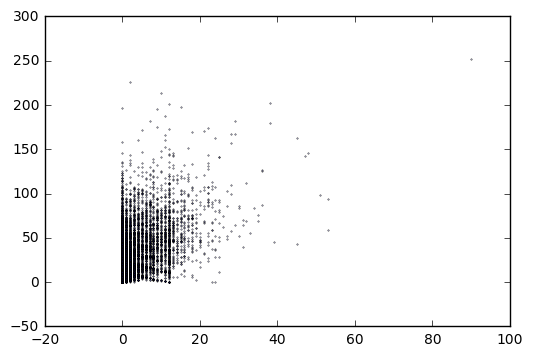

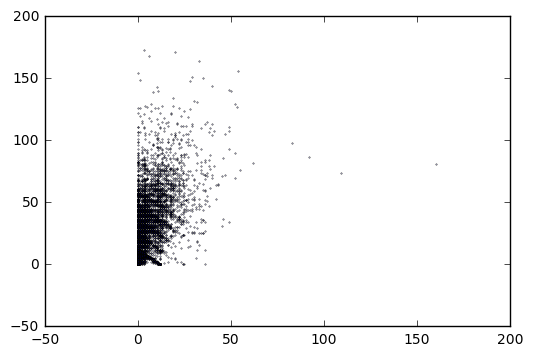

In [56]:
plt.figure()
plt.scatter(ventas_nov_2013,ventas_dic_2013,s=.1)
plt.show()

plt.figure()
plt.scatter(ventas_nov_2012,ventas_dic_2012,s=.1)
plt.show()

In [16]:
#Calcular los datos en octubre.
filter_oct_2013 = ventas['fecha'].dt.strftime('%Y-%m').values=='2013-10' 

ventas_oct_2013 = np.array([ventas[filter_oct_2013 & (ventas['id_pos']==i)]\
['unidades'].values.sum() for i in answer_POS])

filter_oct_2012 = ventas['fecha'].dt.strftime('%Y-%m').values=='2012-10' 

ventas_oct_2012 = np.array([ventas[filter_oct_2012 & (ventas['id_pos']==i)]\
['unidades'].values.sum() for i in answer_POS])


#SAVE 
np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_oct_2013.npy',filter_oct_2013)
np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_oct_2013.npy',ventas_oct_2013)
np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_oct_2012.npy',filter_oct_2012)
np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_oct_2012.npy',ventas_oct_2012)


### Load

In [12]:
filter_oct_2013 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_oct_2013.npy')
ventas_oct_2013 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_oct_2013.npy')
filter_oct_2012 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_oct_2012.npy')
ventas_oct_2012 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_oct_2012.npy')

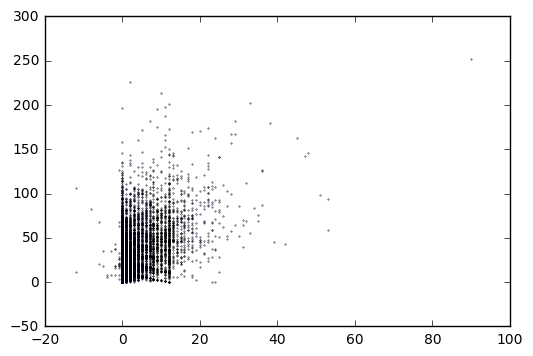

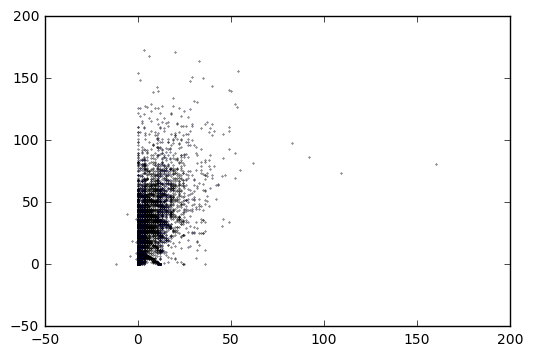

In [22]:
plt.figure()
plt.scatter(ventas_nov_2013-ventas_oct_2013,ventas_dic_2013,s=.1)
plt.show()

plt.figure()
plt.scatter(ventas_nov_2012-ventas_oct_2012,ventas_dic_2012,s=.1)
plt.show()

In [17]:
#El stock al iniciar diciembre es todo lo que se recibió durante el año hasta noviembre inclusive menos 
#todo lo que se vendió durante el año hasta noviembre inclusive

#Calcular los datos de 2012.

filter_envios_2012 = (envios['fecha'] > '2012-01-01') & (envios['fecha'] < '2012-12-01')

filter_ventas_2012 = (ventas['fecha'] > '2012-01-01') & (ventas['fecha'] < '2012-12-01')

envios_2012 = np.array([envios[filter_envios_2012 & (envios['id_pos']==i)]\
['unidades_despachadas'].values.sum() for i in answer_POS])

ventas_2012 = np.array([ventas[filter_ventas_2012 & (ventas['id_pos']==i)]\
['unidades'].values.sum() for i in answer_POS])

#Calcular los datos de 2013.

filter_envios_2013 = (envios['fecha'] > '2013-01-01') & (envios['fecha'] < '2013-12-01')

filter_ventas_2013 = (ventas['fecha'] > '2013-01-01') & (ventas['fecha'] < '2013-12-01')

envios_2013 = np.array([envios[filter_envios_2013 & (envios['id_pos']==i)]\
['unidades_despachadas'].values.sum() for i in answer_POS])

ventas_2013 = np.array([ventas[filter_ventas_2013 & (ventas['id_pos']==i)]\
['unidades'].values.sum() for i in answer_POS])


#SAVE
np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_envios_2012.npy',filter_envios_2012)
np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_ventas_2012.npy',filter_ventas_2012)
np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/envios_2012.npy',envios_2012)
np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_2012.npy',ventas_2012)
np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_envios_2013.npy',filter_envios_2013)
np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_ventas_2013.npy',filter_ventas_2013)
np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/envios_2013.npy',envios_2013)
np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_2013.npy',ventas_2013)


In [25]:
#Calcular los datos de 2014.

filter_envios_2014 = (envios['fecha'] > '2014-01-01') & (envios['fecha'] < '2014-12-01')

filter_ventas_2014 = (ventas['fecha'] > '2014-01-01') & (ventas['fecha'] < '2014-12-01')

envios_2014 = np.array([envios[filter_envios_2014 & (envios['id_pos']==i)]\
['unidades_despachadas'].values.sum() for i in answer_POS])

ventas_2014 = np.array([ventas[filter_ventas_2014 & (ventas['id_pos']==i)]\
['unidades'].values.sum() for i in answer_POS])

np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_envios_2014.npy',filter_envios_2014)
np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_ventas_2014.npy',filter_ventas_2014)
np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/envios_2014.npy',envios_2014)
np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_2014.npy',ventas_2014)

### Load

In [13]:
filter_envios_2012 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_envios_2012.npy')
filter_ventas_2012 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_ventas_2012.npy')
envios_2012 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/envios_2012.npy')
ventas_2012 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_2012.npy')
filter_envios_2013 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_envios_2013.npy')
filter_ventas_2013 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_ventas_2013.npy')
envios_2013 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/envios_2013.npy')
ventas_2013 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_2013.npy')
filter_envios_2014 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_envios_2014.npy')
filter_ventas_2014 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_ventas_2014.npy')
envios_2014 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/envios_2014.npy')
ventas_2014 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_2014.npy')


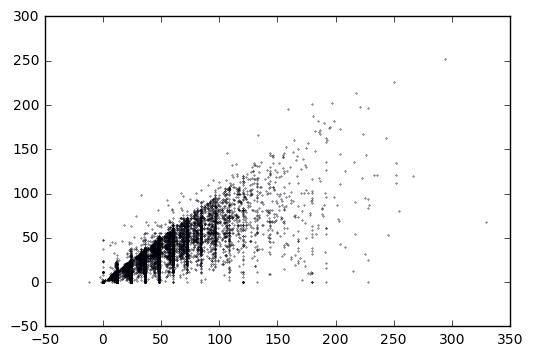

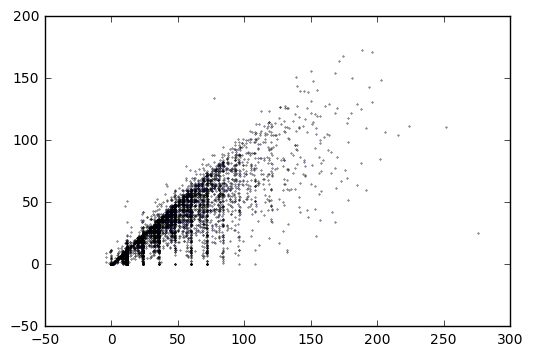

In [14]:
stock_dic_2012 = envios_2012 - ventas_2012
stock_dic_2013 = envios_2013 - ventas_2013
stock_dic_2014 = envios_2014 - ventas_2014

#print(np.unique(stock_dic_2012))
#print(np.unique(stock_dic_2013))

plt.figure()
plt.scatter(stock_dic_2013,ventas_dic_2013,s=.1)
plt.show()

plt.figure()
plt.scatter(stock_dic_2012,ventas_dic_2012,s=.1)
plt.show()

In [26]:
filter_nov_2014 = ventas['fecha'].dt.strftime('%Y-%m').values=='2014-11' 

ventas_nov_2014 = np.array([ventas[filter_nov_2014 & (ventas['id_pos']==i)]\
['unidades'].values.sum() for i in answer_POS])

np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_nov_2014.npy',filter_nov_2014)
np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_nov_2014.npy',ventas_nov_2014)

In [28]:
filter_oct_2014 = ventas['fecha'].dt.strftime('%Y-%m').values=='2014-10' 

ventas_oct_2014 = np.array([ventas[filter_oct_2014 & (ventas['id_pos']==i)]\
['unidades'].values.sum() for i in answer_POS])

np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_oct_2014.npy',filter_oct_2014)
np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_oct_2014.npy',ventas_oct_2014)

### Load

In [15]:
filter_nov_2014 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_nov_2014.npy')
ventas_nov_2014 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_nov_2014.npy')
filter_oct_2014 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_oct_2014.npy')
ventas_oct_2014 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_oct_2014.npy')

Vayamos ahora a las variables fijas de entorno. 
Quiero ver algunos aspectos particulares de estos datos provistos. Me imagino que hay redundancias. Por ejemplo: ingreso_mediana, ingreso_promedio, mediana_valor_hogar me imagino que son similares, veamos.

(12897, 3)


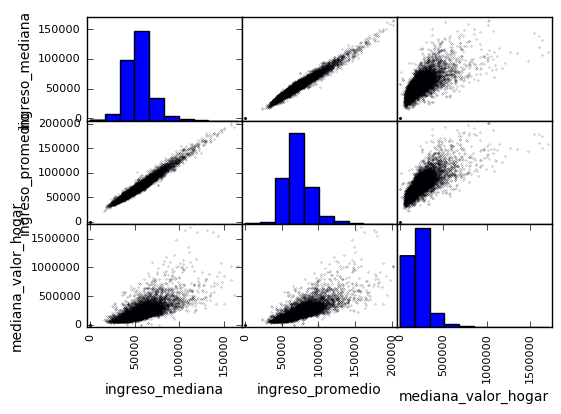

In [47]:
#filter_answer_pos = 
#print(pos[str(pos.index.map(lambda x: x[0] in answer_POS))])
#print(pos[288:131072])
#print(pos.index.values[::100])
#print(str(answer_POS))
print(pos.loc[np.array(answer_POS).astype(str),['ingreso_mediana','ingreso_promedio','mediana_valor_hogar']].fillna(0).values.shape)

ingresos = pos.loc[np.array(answer_POS).astype(str),['ingreso_mediana','ingreso_promedio','mediana_valor_hogar']].fillna(0).values

df = pd.DataFrame(ingresos,columns=['ingreso_mediana','ingreso_promedio','mediana_valor_hogar'])
#print(pos.loc[[list(np.array(answer_POS).astype(str))]])
#print(np.array(answer_POS).astype(str))
#df = pos
#DEL DATAFRAME POS QUIERO QUEDARME SOLO CON LAS ENTRADAS QUE ESTAN EN ANSWER_POS
#df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])
pd.tools.plotting.scatter_matrix(df, alpha=0.9,s=.1)
plt.show()

Obviamente el puntaje público es muy malo: 24.02557

In [26]:
#Calculemos un factor que es la proporción del stock total que se vende
prop_2012 = ventas_dic_2012.sum()/stock_dic_2012.sum()
prop_2013 = ventas_dic_2013.sum()/stock_dic_2013.sum()

print('Proporción 2012: {}'.format(prop_2012))
print('Proporción 2013: {}'.format(prop_2013))

prop_2014 = 2*prop_2013-prop_2012

#La extrapolación es:
print('Proporción 2014: {}'.format(prop_2014))

ventas_prop_2014 = (stock_dic_2014*prop_2014).astype(int)
ventas_prop_2014[ventas_prop_2014 < 0]  = 0

#np.unique(ventas_prop_2014)

pd.DataFrame(ventas_prop_2014,answer_POS)\
.to_csv('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Answers/v0_6.csv',header=False)




Proporción 2012: 0.7305752785789316
Proporción 2013: 0.6546377661428151
Proporción 2014: 0.5787002537066986


El puntaje público es 13.63432.

In [32]:
#Se puede calcular un factor de la misma manera que antes pero para cada POS.

#Si el stock es negativo, digo que es 0
stock_dic_2012[stock_dic_2012 < 0] = 0

prop_pos_2012 = ventas_dic_2012/stock_dic_2012

#Si el stock era 0 y divido, la proporción es 0
prop_pos_2012[np.isnan(prop_pos_2012)==True] = 0
prop_pos_2012[np.isinf(prop_pos_2012)==True] = 0


#print(np.unique(stock_dic_2012))
#print(prop_pos_2012.shape)

###2013
stock_dic_2013[stock_dic_2013 < 0] = 0

prop_pos_2013 = ventas_dic_2013/stock_dic_2013

prop_pos_2013[np.isnan(prop_pos_2013)==True] = 0
prop_pos_2013[np.isinf(prop_pos_2013)==True] = 0


#Hacer extrapolación para 2014 con 2012 y 2013
prop_pos_2014 = 2*prop_pos_2013-prop_pos_2012

pred_prop_pos_2014 = (prop_pos_2014*stock_dic_2014).astype(int)

pred_prop_pos_2014[pred_prop_pos_2014 < 0] = 0

pd.DataFrame(pred_prop_pos_2014,answer_POS)\
.to_csv('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Answers/v0_7.csv',header=False)



print(np.unique(pred_prop_pos_2014))

#print(np.unique(stock_dic_2012))
#print(prop_pos_2012.shape)


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 182 183 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 209 210 211 213 214 215 216 217 218 221
 222 224 225 226 227 228 229 233 234 235 237 238 239 240 243 244 245 246
 247 248 249 250 251 253 254 256 257 258 260 265 26

El puntaje público fue de 23.66392

## Modelos lineales multivariados

- Probemos entrenar un modelo que dependa de las características externas (csv de POS), del stock en el mes de dicimebre, las ventas en el mes anterior y las ventas el año pasado.

In [16]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MaxAbsScaler, StandardScaler

#Usamos 2013 para entrenar y 2014 (en la nube) para testear
#El shape de X debe ser (Numero de answer POS, Cantidad de campos en el csv de POS)

pos_data = pos.loc[np.array(answer_POS).astype(str)].fillna(0).values
dif_ventas_no_2012 = ventas_nov_2012-ventas_oct_2012
#print( pos.loc[np.array(answer_POS).astype(str)].fillna(0).values.shape)
#print(ventas_oct_2012.shape)
#print(ventas_nov_2012.shape)
#print((ventas_nov_2012-ventas_oct_2012).shape)
#print(stock_dic_2012.shape)

#print(np.concatenate((pos_data,stock_dic_2012,ventas_nov_2012,ventas_oct_2012,dif_ventas_no_2012),axis=1).shape)
#print(np.column_stack((pos_data,stock_dic_2012,ventas_nov_2012,ventas_oct_2012,dif_ventas_no_2012)).shape)


X_train = np.column_stack((pos_data,stock_dic_2012,ventas_nov_2012,ventas_oct_2012,dif_ventas_no_2012))
#X_train = np.column_stack((stock_dic_2012,ventas_nov_2012,ventas_oct_2012,dif_ventas_no_2012))
y_train = ventas_dic_2012

print(X_train.shape)
print(y_train.shape)

#Hacer normalizacion
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

lr = LinearRegression().fit(X_train_scaled, y_train)
lasso = Lasso(alpha=0.01).fit(X_train_scaled, y_train)

print("Training set score scaled (Linear regression): {:.2f}".format(lr.score(X_train_scaled, y_train)))
print("Training set score scaled (Lasso): {:.2f}".format(lasso.score(X_train_scaled, y_train)))

lr2 = LinearRegression().fit(X_train, y_train)
lasso2 = Lasso(alpha=0.01).fit(X_train, y_train)

print("Training set score no scaled (Linear regression): {:.2f}".format(lr2.score(X_train, y_train)))
print("Training set score no scaled (Lasso): {:.2f}".format(lasso2.score(X_train, y_train)))

dif_ventas_no_2013 = ventas_nov_2013-ventas_oct_2013

X_test = np.column_stack((pos_data,stock_dic_2013,ventas_nov_2013,ventas_oct_2013,dif_ventas_no_2013))
#X_test = np.column_stack((stock_dic_2013,ventas_nov_2013,ventas_oct_2013,dif_ventas_no_2013))
y_test = ventas_dic_2013

X_test_scaled = scaler.transform(X_test)

y_pred = lr.predict(X_test_scaled)

stock_dic_2013 = np.array([np.clip(stock_dic_2013[i],0,np.inf) for i in range(stock_dic_2013.shape[0]) ])

y_pred = np.array([np.clip(y_pred[i],0,stock_dic_2013[i]) for i in range(y_pred.shape[0]) ])


#print(X_test.shape)
print("Test set score scaled (Linear regression): {:.2f}".format(lr.score(X_test_scaled, y_test)))
print("Test set score scaled (Lasso): {:.2f}".format(lasso.score(X_test_scaled, y_test)))

#print(y_pred)
#print(y_test)

#print(np.unique(y_pred))
#print(np.unique(y_test))
#print(np.unique(stock_dic_2013))

print('Linear Regression MAE: {}'.format(mean_absolute_error(y_pred,y_test)))

y_pred = lasso.predict(X_test_scaled)

y_pred = np.array([np.clip(y_pred[i],0,stock_dic_2013[i]) for i in range(y_pred.shape[0]) ])

print((y_pred>0).sum())
print(lr.coef_)
print(lasso.coef_)

print('Lasso MAE: {}'.format(mean_absolute_error(y_pred,y_test)))
#Hacer Lasso

#Incluir interacciones cuadráticas




#X_train, X_test, y_train, y_test
#lr = LinearRegression().fit(X_train, y_train)

#print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
#print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

(12897, 36)
(12897,)
Training set score scaled (Linear regression): 0.85
Training set score scaled (Lasso): 0.85
Training set score no scaled (Linear regression): 0.85
Training set score no scaled (Lasso): 0.85
Test set score scaled (Linear regression): 0.73
Test set score scaled (Lasso): 0.73
Linear Regression MAE: 7.832739639658169
11466
[  6.86345755e-02  -3.65943545e-02  -1.70300618e-01  -3.09718202e-01
  -2.52616779e-01  -1.62795859e-01   4.53293326e-01   1.45682523e-01
  -1.21752058e-01   9.42486211e-02   3.12897427e-01  -1.75122334e-01
  -2.45181669e-02   1.24773493e-01  -1.66007157e-01  -3.43157857e-01
   2.51809423e-01   1.22216475e-01  -3.24251293e-01   2.87663693e-01
  -8.93540937e-02   4.84111975e-02  -1.86903052e-01   3.78095473e-02
   1.35324961e-01   2.76492613e-01  -8.19470171e-02   2.37244605e-01
   4.69959052e-02   9.60546251e-02  -1.03200963e-01   3.97131560e-01
   1.89714538e+01   6.55281658e+13  -1.86589306e+12  -6.55174983e+13]
[  5.45964760e-02  -4.15159570e-02  

In [24]:
#Datos de entrenamiento
#X_train = np.column_stack((pos_data,stock_dic_2013,ventas_nov_2013,ventas_oct_2013,dif_ventas_no_2013))
X_train = np.column_stack((stock_dic_2013,ventas_nov_2013,ventas_oct_2013,dif_ventas_no_2013))
y_train = ventas_dic_2013

#Hacer normalizacion
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

#Entrenar modelo
lasso = Lasso(alpha=0.1).fit(X_train_scaled, y_train)

#R^2 en el entrenamiento
print("Training set score scaled (Lasso): {:.2f}".format(lasso.score(X_train_scaled, y_train)))


#Defino la entrada para prediccion
stock_dic_2014 = np.array([np.clip(stock_dic_2014[i],0,np.inf) for i in range(stock_dic_2014.shape[0]) ])
dif_ventas_no_2014 = ventas_nov_2014-ventas_oct_2014
#X_test = np.column_stack((pos_data,stock_dic_2014,ventas_nov_2014,ventas_oct_2014,dif_ventas_no_2014))
X_test = np.column_stack((stock_dic_2013,ventas_nov_2013,ventas_oct_2013,dif_ventas_no_2013))

X_test_scaled = scaler.transform(X_test)

y_pred = lasso.predict(X_test_scaled)

print(lasso.coef_)


y_pred = np.array([np.clip(y_pred[i],0,stock_dic_2014[i]) for i in range(y_pred.shape[0]) ])

print(np.unique(np.round(y_pred).astype(int)))
print((y_pred>0).sum())

pd.DataFrame(y_pred.astype(int),answer_POS)\
.to_csv('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Answers/v1_9.csv',header=False)

Training set score scaled (Lasso): 0.74
[ 19.83146237   3.97600011   0.18302492   0.        ]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 117 118 120 122 123 124 126 127 130 131
 133 134 135 137 139 140 141 142 149 151 155 188]
12357


- El puntaje público fue de 11.074 con $\alpha$ = 0.1 corriendo lasso con 4 variables (archivo v_1 o v_2)
- $\alpha$ =  0.01: 10.997
- $\alpha$ =  0.001: 10.995
- $\alpha$ =  0.0001: 10.996
- Incluyendo la informacion de POS el puntaje público fue de 13.751

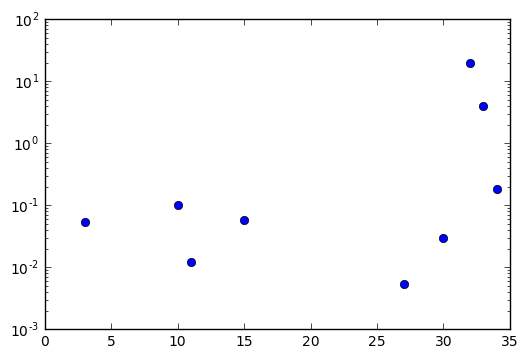

['competidores', 'ingreso_mediana', 'ingreso_promedio', 'densidad_poblacional', 'pct_0a5', 'pct_5a9', 'pct_10a14', 'pct_15a19', 'pct_20a24', 'pct_25a29', 'pct_30a34', 'pct_35a39', 'pct_40a44', 'pct_45a49', 'pct_50a54', 'pct_55a59', 'pct_60a64', 'pct_65a69', 'pct_70a74', 'pct_75a79', 'pct_80a84', 'pct_85ainf', 'pct_bachelors', 'pct_doctorados', 'pct_secundario', 'pct_master', 'pct_bicicleta', 'pct_omnibus', 'pct_subtes', 'pct_taxi', 'pct_caminata', 'mediana_valor_hogar']
(array([ 3, 10, 11, 15, 27, 30, 32, 33, 34]),)


In [65]:
plt.figure()
plt.plot(lasso.coef_,'o')
plt.yscale('log')
plt.show()

print(list(pos.columns.values))

print(np.where(lasso.coef_ > 1E-3))

Features que parecen ser relevantes:
- stock
- ventas nov
- ventas oct
- pct 30 a 34 (10)
- pct 55 a 59 (15)
- Densidad poblacional (3)
- pct caminata (30)

- pct 35 a 39 menos (11)
- pct omnibus (27) mucho menos



In [74]:
#Datos de entrenamiento
X_train = np.column_stack((pos_data[:,10],
                           pos_data[:,15],
                           pos_data[:,3],
                           pos_data[:,30],
                           stock_dic_2013,
                           ventas_nov_2013,
                           ventas_oct_2013))

#X_train = np.column_stack((stock_dic_2013,ventas_nov_2013,ventas_oct_2013,dif_ventas_no_2013))
y_train = ventas_dic_2013

#Hacer normalizacion
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

#Entrenar modelo
lasso3 = Lasso(alpha=0.01).fit(X_train_scaled, y_train)
#lr3 = LinearRegression().fit(X_train_scaled, y_train)

#R^2 en el entrenamiento
#print("Training set score scaled (Lasso): {:.2f}".format(lr3.score(X_train_scaled, y_train)))
print("Training set score scaled (Lasso): {:.2f}".format(lasso3.score(X_train_scaled, y_train)))


#Defino la entrada para prediccion
stock_dic_2014 = np.array([np.clip(stock_dic_2014[i],0,np.inf) for i in range(stock_dic_2014.shape[0]) ])

X_test = np.column_stack((pos_data[:,10],
                          pos_data[:,15],
                          pos_data[:,3],
                          pos_data[:,30],
                          stock_dic_2014,
                          ventas_nov_2014,
                          ventas_oct_2014))

#X_test = np.column_stack((stock_dic_2013,ventas_nov_2013,ventas_oct_2013,dif_ventas_no_2013))

X_test_scaled = scaler.transform(X_test)

#y_pred = lr3.predict(X_test_scaled)
y_pred = lasso3.predict(X_test_scaled)

#print(lr3.coef_)
print(lasso3.coef_)


y_pred = np.array([np.clip(y_pred[i],0,stock_dic_2014[i]) for i in range(y_pred.shape[0]) ])

print(np.unique(y_pred.astype(int)))
print((y_pred>0).sum())

pd.DataFrame(y_pred.astype(int),answer_POS)\
.to_csv('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Answers/v1_3.csv',header=False)

Training set score scaled (Lasso): 0.74
[  0.20803022   0.20372749   0.09172329   0.11809233  19.88588994
   4.02777753   0.26434723]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 143 144 146
 147 148 149 150 152 153 154 155 156 157 158 159 161 162 163 165 166 167
 168 169 170 171 172 173 174 176 178 179 180 181 182 187 189 190 191 192
 193 195 196 197 199 200 201 203 205 208 211 213 214 216 218 220 222 234
 239 241 244 257 279 293 317 324]
12357


- LR con 7 variables: 13.743
- Lasso con 7 variables $\alpha$ = 0.01: 13.744 

In [77]:
#Datos de entrenamiento
X_train = np.column_stack((stock_dic_2013,
                           ventas_nov_2013,
                           ventas_oct_2013))

#X_train = np.column_stack((stock_dic_2013,ventas_nov_2013,ventas_oct_2013,dif_ventas_no_2013))
y_train = ventas_dic_2013

#Hacer normalizacion
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

#Entrenar modelo
lasso4 = Lasso(alpha=0.1).fit(X_train_scaled, y_train)
#lr4 = LinearRegression().fit(X_train_scaled, y_train)

#R^2 en el entrenamiento
#print("Training set score scaled (LR): {:.2f}".format(lr4.score(X_train_scaled, y_train)))
print("Training set score scaled (Lasso): {:.2f}".format(lasso4.score(X_train_scaled, y_train)))


#Defino la entrada para prediccion
stock_dic_2014 = np.array([np.clip(stock_dic_2014[i],0,np.inf) for i in range(stock_dic_2014.shape[0]) ])

X_test = np.column_stack((stock_dic_2014,
                          ventas_nov_2014,
                          ventas_oct_2014))

#X_test = np.column_stack((stock_dic_2013,ventas_nov_2013,ventas_oct_2013,dif_ventas_no_2013))

X_test_scaled = scaler.transform(X_test)

#y_pred = lr4.predict(X_test_scaled)
y_pred = lasso4.predict(X_test_scaled)

#print(lr4.coef_)
print(lasso4.coef_)


y_pred = np.array([np.clip(y_pred[i],0,stock_dic_2014[i]) for i in range(y_pred.shape[0]) ])

print(np.unique(y_pred.astype(int)))
print((y_pred>0).sum())

pd.DataFrame(y_pred.astype(int),answer_POS)\
.to_csv('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Answers/v1_4.csv',header=False)

Training set score scaled (Lasso): 0.74
[ 19.83146237   3.97600011   0.18302492]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 139 140 141 142 143 144 145
 146 147 148 150 152 153 154 155 156 157 158 159 160 162 163 165 166 167
 168 169 172 174 175 176 178 179 180 181 182 187 188 190 191 193 194 195
 196 198 199 201 202 203 204 207 211 212 213 215 217 220 222 233 239 240
 244 257 277 292 315 323]
12357


- LR con 3 variables: 13.572
- Lasso $\alpha$ = 0.1 con 3 variables: 13.741


Training set score scaled (Lasso): 0.76
[  0.00000000e+00   2.29661327e+01   3.14195141e+00   0.00000000e+00
   0.00000000e+00  -2.04729361e+00   1.54589656e+00   1.45875054e-01
   0.00000000e+00  -2.90165793e-01  -3.73593487e-03  -0.00000000e+00
   2.16191971e-03  -4.10783559e-02  -0.00000000e+00]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  25  29  30  31  34  35  36  37  38  39  41  42
  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 121 122 123 124 125 126 128 131 132 133 134 135 136
 137 138 139 141 143 145 147 148 149 151 161 162 164 167 173 183 193 194
 195 212]
12354
['1', 'x0', 'x1', 'x2', 'x3', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x1^2', 'x1 x2', 'x1 x3', 'x2^2', '

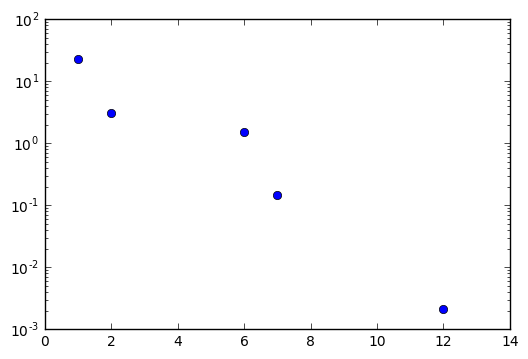

In [98]:
from sklearn.preprocessing import PolynomialFeatures

#Datos de entrenamiento
#X_train = np.column_stack((pos_data[:,10],
#                           pos_data[:,15],
#                           pos_data[:,3],
#                           pos_data[:,30],
#                           stock_dic_2013,
#                           ventas_nov_2013,
#                           ventas_oct_2013))

#X_train = np.column_stack((pos_data[:,10],
#                           pos_data[:,15],
#                           stock_dic_2013,
#                           ventas_nov_2013,
#                           ventas_oct_2013))

X_train = np.column_stack((stock_dic_2013,
                           ventas_nov_2013,
                           ventas_oct_2013,
                           dif_ventas_no_2013))

#X_train = np.column_stack((stock_dic_2013,ventas_nov_2013,ventas_oct_2013,dif_ventas_no_2013))
y_train = ventas_dic_2013

#Hacer normalizacion
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

poly = PolynomialFeatures(degree=2).fit(X_train_scaled)

X_train_poly = poly.transform(X_train_scaled)

#Entrenar modelo
lasso4 = Lasso(alpha=0.1).fit(X_train_poly, y_train)
#lr3 = LinearRegression().fit(X_train_scaled, y_train)

#R^2 en el entrenamiento
#print("Training set score scaled (Lasso): {:.2f}".format(lr3.score(X_train_scaled, y_train)))
print("Training set score scaled (Lasso): {:.2f}".format(lasso4.score(X_train_poly, y_train)))


#Defino la entrada para prediccion
stock_dic_2014 = np.array([np.clip(stock_dic_2014[i],0,np.inf) for i in range(stock_dic_2014.shape[0]) ])

#X_test = np.column_stack((pos_data[:,10],
#                          pos_data[:,15],
#                          pos_data[:,3],
#                          pos_data[:,30],
#                          stock_dic_2014,
#                          ventas_nov_2014,
#                          ventas_oct_2014))

#X_test = np.column_stack((pos_data[:,10],
#                          pos_data[:,15],
#                          stock_dic_2014,
#                          ventas_nov_2014,
#                          ventas_oct_2014))

X_test = np.column_stack((stock_dic_2014,
                          ventas_nov_2014,
                          ventas_oct_2014,
                          dif_ventas_no_2014))

#X_test = np.column_stack((stock_dic_2013,ventas_nov_2013,ventas_oct_2013,dif_ventas_no_2013))

X_test_scaled = scaler.transform(X_test)
X_test_poly = poly.transform(X_test_scaled)

#y_pred = lr3.predict(X_test_scaled)
y_pred = lasso4.predict(X_test_poly)

#print(lr3.coef_)
print(lasso4.coef_)


y_pred = np.array([np.clip(y_pred[i],0,stock_dic_2014[i]) for i in range(y_pred.shape[0]) ])

print(np.unique(y_pred.astype(int)))
print((y_pred>0).sum())

pd.DataFrame(y_pred.astype(int),answer_POS)\
.to_csv('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Answers/v1_5.csv',header=False)

print(poly.get_feature_names())

plt.figure()
plt.plot(lasso4.coef_,'o')
plt.yscale('log')
plt.show()


- Con interacciones cuadraticas de 7 variables $\alpha$ = 0.01: 12.598
- $\alpha$ = 0.1: 12.632
- $\alpha$ = 0.0001: 12.602

- Con interacciones cuadraticas de 5 variables $\alpha$ = 0.01: 12.591
- $\alpha$ = 0.1: 12.645

- Con interacciones cuadraticas de 3 variables 
- $\alpha$ = 0.1: 12.661

- Con interacciones cuadraticas de 4 variables 
- $\alpha$ = 0.1: 12.661


/home/rodo/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Training set score scaled (Lasso): 0.78
[  0.00000000e+00   6.68767183e-01   4.11448122e+00   1.97062927e+01
   3.15695482e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.24779707e-01   0.00000000e+00   1.52673574e+00   0.00000000e+00
  -9.27076714e-02   0.00000000e+00  -2.13482173e-01  -2.68483904e-01
   1.18535630e+00  -1.47562478e+00  -2.89829742e-01  -0.00000000e+00
  -6.67386720e-01  -2.58359802e+00   2.36381917e+00   5.45354016e-01
   0.00000000e+00  -8.96644667e-01  -2.58783888e-01  -0.00000000e+00
  -0.00000000e+00  -1.83566524e-01   5.96188631e-03  -8.29217371e-02
  -8.38899450e-02  -0.00000000e+00  -0.00000000e+00   2.37246187e-01]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  

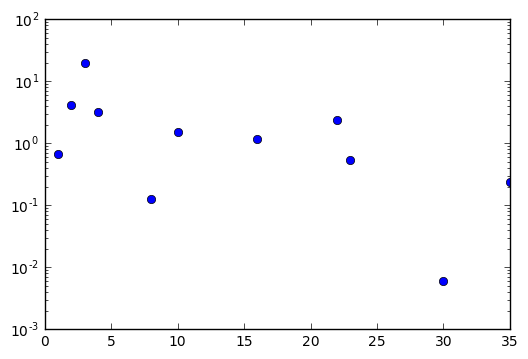

In [102]:
#Probemos con las cuatro variables que anduvieron bien y con las cantidades semanales

#Probemos con las cuatro variables que anduvieron bien pero de años anteriores

#Datos de entrenamiento
X_train = np.column_stack((ventas_nov_2012,
                           ventas_dic_2012,
                           stock_dic_2013,
                           ventas_nov_2013,
                           ventas_oct_2013,
                           dif_ventas_no_2013,
                           dif_ventas_no_2012))

#X_train = np.column_stack((stock_dic_2013,ventas_nov_2013,ventas_oct_2013,dif_ventas_no_2013))
y_train = ventas_dic_2013

#Hacer normalizacion
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

poly = PolynomialFeatures(degree=2).fit(X_train_scaled)

X_train_poly = poly.transform(X_train_scaled)

#Entrenar modelo
lasso5 = Lasso(alpha=0.01).fit(X_train_poly, y_train)
#lr3 = LinearRegression().fit(X_train_scaled, y_train)

#R^2 en el entrenamiento
#print("Training set score scaled (Lasso): {:.2f}".format(lr3.score(X_train_scaled, y_train)))
#print("Training set score scaled (Lasso): {:.2f}".format(lasso4.score(X_train_poly, y_train)))
print("Training set score scaled (Lasso): {:.2f}".format(lasso5.score(X_train_poly, y_train)))


#Defino la entrada para prediccion
stock_dic_2014 = np.array([np.clip(stock_dic_2014[i],0,np.inf) for i in range(stock_dic_2014.shape[0]) ])

X_test = np.column_stack((ventas_nov_2013,
                          ventas_dic_2013,
                          stock_dic_2014,
                          ventas_nov_2014,
                          ventas_oct_2014,
                          dif_ventas_no_2014,
                          dif_ventas_no_2013))

#X_test = np.column_stack((stock_dic_2013,ventas_nov_2013,ventas_oct_2013,dif_ventas_no_2013))

X_test_scaled = scaler.transform(X_test)
X_test_poly = poly.transform(X_test_scaled)

#y_pred = lr3.predict(X_test_scaled)
y_pred = lasso5.predict(X_test_poly)

#print(lr3.coef_)
print(lasso5.coef_)


y_pred = np.array([np.clip(y_pred[i],0,stock_dic_2014[i]) for i in range(y_pred.shape[0]) ])

print(np.unique(y_pred.astype(int)))
print((y_pred>0).sum())

pd.DataFrame(y_pred.astype(int),answer_POS)\
.to_csv('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Answers/v1_6.csv',header=False)

plt.figure()
plt.plot(lasso5.coef_,'o')
plt.yscale('log')
plt.show()

- Con los datos de años anteriores $\alpha$ = 13.075


In [104]:
#Vamos a calcular las ventas por semana

filter_45_2013 = ventas['fecha'].dt.strftime('%Y-%W').values=='2013-45'

ventas_45_2013 = np.array([ventas[filter_45_2013 & (ventas['id_pos']==i)]\
['unidades'].values.sum() for i in answer_POS])

filter_46_2013 = ventas['fecha'].dt.strftime('%Y-%W').values=='2013-46'

ventas_46_2013 = np.array([ventas[filter_46_2013 & (ventas['id_pos']==i)]\
['unidades'].values.sum() for i in answer_POS])

filter_47_2013 = ventas['fecha'].dt.strftime('%Y-%W').values=='2013-47'

ventas_47_2013 = np.array([ventas[filter_47_2013 & (ventas['id_pos']==i)]\
['unidades'].values.sum() for i in answer_POS])

np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_45_2013.npy',filter_45_2013)
np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_45_2013.npy',ventas_45_2013)

np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_46_2013.npy',filter_46_2013)
np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_46_2013.npy',ventas_46_2013)

np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_47_2013.npy',filter_47_2013)
np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_47_2013.npy',ventas_47_2013)

#print(ventas['fecha'].dt.strftime('%Y-%W').values)

In [105]:
filter_45_2014 = ventas['fecha'].dt.strftime('%Y-%W').values=='2014-45'

ventas_45_2014 = np.array([ventas[filter_45_2014 & (ventas['id_pos']==i)]\
['unidades'].values.sum() for i in answer_POS])

filter_46_2014 = ventas['fecha'].dt.strftime('%Y-%W').values=='2014-46'

ventas_46_2014 = np.array([ventas[filter_46_2014 & (ventas['id_pos']==i)]\
['unidades'].values.sum() for i in answer_POS])

filter_47_2014 = ventas['fecha'].dt.strftime('%Y-%W').values=='2014-47'

ventas_47_2014 = np.array([ventas[filter_47_2014 & (ventas['id_pos']==i)]\
['unidades'].values.sum() for i in answer_POS])

np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_45_2013.npy',filter_45_2014)
np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_45_2013.npy',ventas_45_2014)

np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_46_2013.npy',filter_46_2014)
np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_46_2013.npy',ventas_46_2014)

np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_47_2013.npy',filter_47_2014)
np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_47_2013.npy',ventas_47_2014)

In [70]:
filter_45_2012 = ventas['fecha'].dt.strftime('%Y-%W').values=='2012-45'

ventas_45_2012 = np.array([ventas[filter_45_2012 & (ventas['id_pos']==i)]\
['unidades'].values.sum() for i in answer_POS])

filter_46_2012 = ventas['fecha'].dt.strftime('%Y-%W').values=='2012-46'

ventas_46_2012 = np.array([ventas[filter_46_2012 & (ventas['id_pos']==i)]\
['unidades'].values.sum() for i in answer_POS])

filter_47_2012 = ventas['fecha'].dt.strftime('%Y-%W').values=='2012-47'

ventas_47_2012 = np.array([ventas[filter_47_2012 & (ventas['id_pos']==i)]\
['unidades'].values.sum() for i in answer_POS])

np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_45_2012.npy',filter_45_2012)
np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_45_2012.npy',ventas_45_2012)

np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_46_2012.npy',filter_46_2012)
np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_46_2012.npy',ventas_46_2012)

np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_47_2012.npy',filter_47_2012)
np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_47_2012.npy',ventas_47_2012)

### Load

In [16]:
filter_45_2013 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_45_2013.npy')
ventas_45_2013 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_45_2013.npy')
filter_46_2013 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_46_2013.npy')
ventas_46_2013 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_46_2013.npy')
filter_47_2013 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_47_2013.npy')
ventas_47_2013 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_47_2013.npy')
filter_45_2014 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_45_2013.npy')
ventas_45_2014 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_45_2013.npy')
filter_46_2014 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_46_2013.npy')
ventas_46_2014 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_46_2013.npy')
filter_47_2014 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_47_2013.npy')
ventas_47_2014 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_47_2013.npy')
filter_45_2012 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_45_2012.npy')
ventas_45_2012 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_45_2012.npy')
filter_46_2012 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_46_2012.npy')
ventas_46_2012 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_46_2012.npy')
filter_47_2012 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_47_2012.npy')
ventas_47_2012 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_47_2012.npy')

In [23]:
from sklearn.linear_model import Ridge

X_train = np.column_stack((pos_data,stock_dic_2013,ventas_nov_2013,ventas_oct_2013,dif_ventas_no_2013))
y_train = ventas_dic_2013

#Hacer normalizacion
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

#Entrenar modelo
ridge = Ridge(alpha=100).fit(X_train_scaled, y_train)

#R^2 en el entrenamiento
print("Training set score scaled (Ridge): {:.2f}".format(ridge.score(X_train_scaled, y_train)))


#Defino la entrada para prediccion
stock_dic_2014 = np.array([np.clip(stock_dic_2014[i],0,np.inf) for i in range(stock_dic_2014.shape[0]) ])
dif_ventas_no_2014 = ventas_nov_2014-ventas_oct_2014
#X_test = np.column_stack((pos_data,stock_dic_2014,ventas_nov_2014,ventas_oct_2014,dif_ventas_no_2014))
X_test = np.column_stack((pos_data,stock_dic_2014,ventas_nov_2014,ventas_oct_2014,dif_ventas_no_2014))

X_test_scaled = scaler.transform(X_test)

y_pred = ridge.predict(X_test_scaled)

print(ridge.coef_)


y_pred = np.array([np.clip(y_pred[i],0,stock_dic_2014[i]) for i in range(y_pred.shape[0]) ])

print(np.unique(y_pred.astype(int)))
print((y_pred>0).sum())

pd.DataFrame(y_pred.astype(int),answer_POS)\
.to_csv('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Answers/v1_8.csv',header=False)

Training set score scaled (Ridge): 0.74
[ -3.40069249e-02   8.74788759e-01  -9.76043957e-02   6.46800708e-01
   2.74125946e-01  -4.37668681e-01   9.57517105e-02   6.28315861e-02
  -2.72542140e-01   1.06846888e-01   7.87441130e-02   3.65159128e-02
  -2.54539110e-02   2.00214996e-02  -1.45413319e-01   4.74311461e-01
  -3.91106770e-01   1.66347252e-01  -3.58741030e-01   8.65289342e-01
  -4.80334727e-01  -4.63562986e-02  -2.81299501e-02   3.76064650e-01
  -6.39441982e-03  -6.33731785e-01   1.65912008e-01   4.07989610e-03
  -3.90713848e-01  -1.39941384e-01   2.18935680e-01  -4.99585330e-01
   1.97228759e+01   2.05372778e+00   4.45456935e-01   2.03035501e+00]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  

/home/rodo/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Training set score scaled (Lasso): 0.77
[  0.00000000e+00   2.29633927e+01  -4.73794489e-01   4.15076449e-01
   1.41455606e+00   1.22953838e+00   2.51919089e+00  -2.23947356e+00
   4.30045199e-01   1.98081662e-01   1.41982647e-01   1.38877717e-01
   1.48250398e+00   6.88414361e-01   5.75057474e-01   4.62099172e-01
  -2.12849882e-01  -8.93326447e-01  -1.20249583e-02  -5.16706123e-01
   4.95121929e-02  -6.33836797e-01  -2.81101563e-01  -3.13276623e-01
  -4.54711446e-01  -6.90087647e-02   1.33936892e-01   4.10833145e-02]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 1

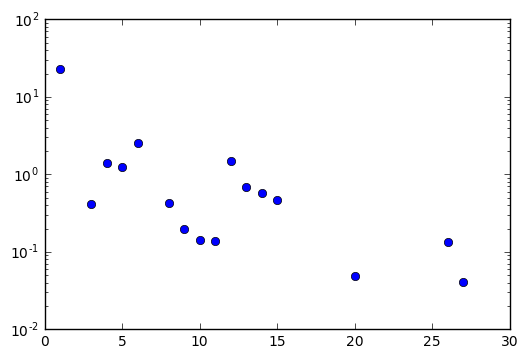

In [108]:
#Probemos con las cuatro variables que anduvieron bien y con las cantidades semanales


#Datos de entrenamiento
X_train = np.column_stack((stock_dic_2013,
                           ventas_nov_2013,
                           ventas_oct_2013,
                           ventas_45_2013,
                           ventas_46_2013,
                           ventas_47_2013))

#X_train = np.column_stack((stock_dic_2013,ventas_nov_2013,ventas_oct_2013,dif_ventas_no_2013))
y_train = ventas_dic_2013

#Hacer normalizacion
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

poly = PolynomialFeatures(degree=2).fit(X_train_scaled)

X_train_poly = poly.transform(X_train_scaled)

#Entrenar modelo
#lasso6 = Lasso(alpha=0.01).fit(X_train_scaled, y_train)
lasso6 = Lasso(alpha=0.001).fit(X_train_poly, y_train)


#R^2 en el entrenamiento

#print("Training set score scaled (Lasso): {:.2f}".format(lasso6.score(X_train_scaled, y_train)))
print("Training set score scaled (Lasso): {:.2f}".format(lasso6.score(X_train_poly, y_train)))


#Defino la entrada para prediccion
stock_dic_2014 = np.array([np.clip(stock_dic_2014[i],0,np.inf) for i in range(stock_dic_2014.shape[0]) ])

X_test = np.column_stack((stock_dic_2014,
                           ventas_nov_2014,
                           ventas_oct_2014,
                           ventas_45_2014,
                           ventas_46_2014,
                           ventas_47_2014))



#X_test_scaled = scaler.transform(X_test)
X_test_poly = poly.transform(X_test_scaled)


#y_pred = lasso6.predict(X_test_scaled)
y_pred = lasso6.predict(X_test_poly)

#print(lr3.coef_)
print(lasso6.coef_)


y_pred = np.array([np.clip(y_pred[i],0,stock_dic_2014[i]) for i in range(y_pred.shape[0]) ])

print(np.unique(y_pred.astype(int)))
print((y_pred>0).sum())

pd.DataFrame(y_pred.astype(int),answer_POS)\
.to_csv('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Answers/v1_7.csv',header=False)

plt.figure()
plt.plot(lasso6.coef_,'o')
plt.yscale('log')
plt.show()

- $\alpha$ = 0.01: 13.638
- $\alpha$ = 0.01: 12.469 (con interacciones)

# Modelos probabilisticos

Intentemos determinar la probabilidad condicionada de ventas de un mes dado que se vendió una cierta cantidad el mes pasado. Vamos a hacer eso en intervalos de a 10.

Quiero ver si existe una distribución general para la probabilidad condicionada de venta de cada POS. No voy a usar en principio información del entorno.

252
90
26 10


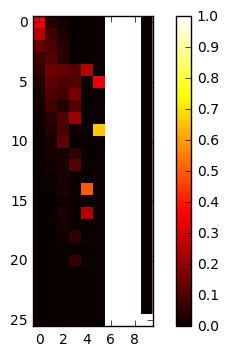

18 17


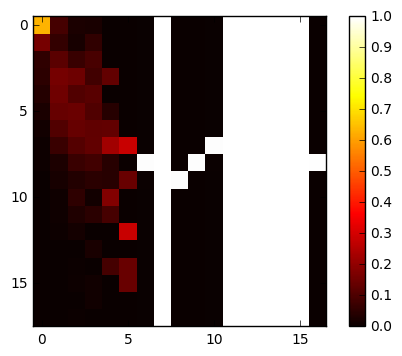

26 17


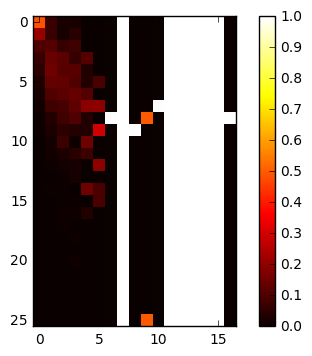

In [57]:
#¿Cuál es el máximo de ventas en diciembre para un POS? (Hagámoslo para 2013)

print(ventas_dic_2013.max())
print(ventas_nov_2013.max())

#2013
x_dic = int(ventas_dic_2013.max()/10)+1
x_nov = int(ventas_nov_2013.max()/10)+1

print(x_dic,x_nov)

mx_con_2013 = np.zeros([x_dic,x_nov])

for i in range(ventas_dic_2013.shape[0]):
    
    mx_con_2013[int(ventas_dic_2013[i]/10),int(ventas_nov_2013[i]/10)] += 1
    
#Normalizar
prob_con_2013 = mx_con_2013 / mx_con_2013.sum(axis=0)


plt.figure()
plt.imshow(prob_con_2013,'hot',interpolation='none')
plt.colorbar()
plt.show()

#2012
x_dic = int(ventas_dic_2012.max()/10)+1
x_nov = int(ventas_nov_2012.max()/10)+1

print(x_dic,x_nov)

mx_con_2012 = np.zeros([x_dic,x_nov])

for i in range(ventas_dic_2012.shape[0]):
    
    mx_con_2012[int(ventas_dic_2012[i]/10),int(ventas_nov_2012[i]/10)] += 1
    
#Normalizar
prob_con_2012 = mx_con_2012 / mx_con_2012.sum(axis=0)


plt.figure()
plt.imshow(prob_con_2012,'hot',interpolation='none')
plt.colorbar()
plt.show()

#Los dos años
x_dic = int(np.max([ventas_dic_2012.max(),ventas_dic_2013.max()])/10)+1
x_nov = int(np.max([ventas_nov_2012.max(),ventas_nov_2013.max()])/10)+1

print(x_dic,x_nov)

mx_con_total = np.zeros([x_dic,x_nov])

for i in range(ventas_dic_2012.shape[0]):
    
    mx_con_total[int(ventas_dic_2012[i]/10),int(ventas_nov_2012[i]/10)] += 1
    
for i in range(ventas_dic_2013.shape[0]):
    
    mx_con_total[int(ventas_dic_2013[i]/10),int(ventas_nov_2013[i]/10)] += 1
    
#Normalizar
prob_con_total = mx_con_total / mx_con_total.sum(axis=0)


plt.figure()
plt.imshow(prob_con_total,'hot',interpolation='none')
plt.colorbar()
plt.show()



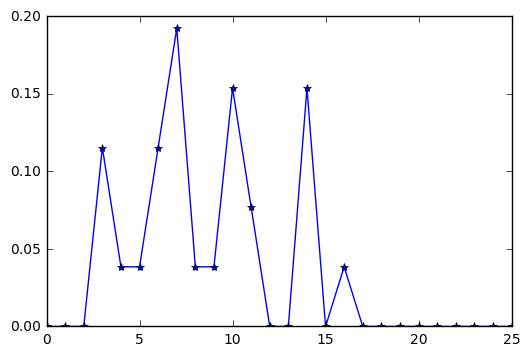

In [62]:
plt.figure()
plt.plot(prob_con_total[:,4],'*-')
plt.show()

Podemos hacer un modelo muy pero muy sencillo en el cual la probabilidad condicionada es poisson y está dada por el grupo tomado de a 10 de ventas en noviembre. La predicción será el número de grupo por 2 (es tomar la media o moda de la distribución de poisson) y de allí quedarse con el número a la mitad del grupo.

In [67]:
y_pred = np.array([10*int(i/10) for i in ventas_nov_2014])

y_pred = np.array([np.clip(y_pred[i],0,stock_dic_2014[i]) for i in range(y_pred.shape[0]) ])

pd.DataFrame(y_pred.astype(int),answer_POS)\
.to_csv('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Answers/v2_0.csv',header=False)

Me da alrededor de 20 el puntaje público

Hagamos lo mismo pero en lugar de utilizar la información del mes anterior, que sean las ventas de la semana anterior tomadas en grupos de a 5.

26 7


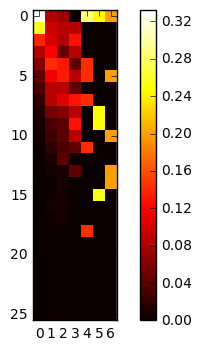

18 6


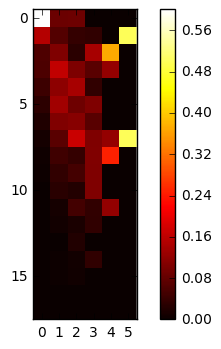

26 7


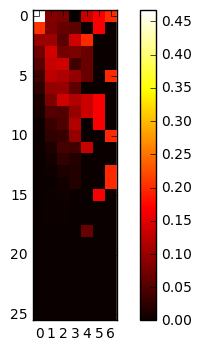

In [73]:
#2013

x_dic = int(ventas_dic_2013.max()/10)+1
x_47 = int(ventas_47_2013.max()/5)+1

print(x_dic,x_47)

mx_con_2013 = np.zeros([x_dic,x_47])

for i in range(ventas_dic_2013.shape[0]):
    
    mx_con_2013[int(ventas_dic_2013[i]/10),int(ventas_47_2013[i]/5)] += 1
    
#Normalizar
prob_con_2013 = mx_con_2013 / mx_con_2013.sum(axis=0)


plt.figure()
plt.imshow(prob_con_2013,'hot',interpolation='none')
plt.colorbar()
plt.show()


#2012

x_dic = int(ventas_dic_2012.max()/10)+1
x_47 = int(ventas_47_2012.max()/5)+1

print(x_dic,x_47)

mx_con_2012 = np.zeros([x_dic,x_47])

for i in range(ventas_dic_2012.shape[0]):
    
    mx_con_2012[int(ventas_dic_2012[i]/10),int(ventas_47_2012[i]/5)] += 1
    
#Normalizar
prob_con_2012 = mx_con_2012 / mx_con_2012.sum(axis=0)


plt.figure()
plt.imshow(prob_con_2012,'hot',interpolation='none')
plt.colorbar()
plt.show()

#Total

x_dic = int(np.max([ventas_dic_2012.max(),ventas_dic_2013.max()])/10)+1
x_47 = int(np.max([ventas_47_2012.max(),ventas_47_2013.max()])/5)+1

print(x_dic,x_47)

mx_con_total = np.zeros([x_dic,x_47])

for i in range(ventas_dic_2012.shape[0]):
    
    mx_con_total[int(ventas_dic_2012[i]/10),int(ventas_47_2012[i]/5)] += 1
    
for i in range(ventas_dic_2013.shape[0]):
    
    mx_con_total[int(ventas_dic_2013[i]/10),int(ventas_47_2013[i]/5)] += 1
    
#Normalizar
prob_con_total = mx_con_total / mx_con_total.sum(axis=0)


plt.figure()
plt.imshow(prob_con_total,'hot',interpolation='none')
plt.colorbar()
plt.show()

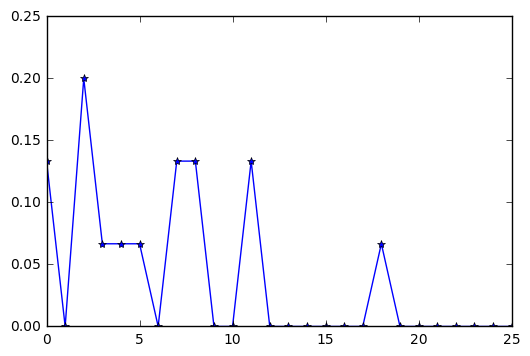

In [80]:
plt.figure()
plt.plot(prob_con_total[:,4],'*-')
plt.show()

(12897, 32)


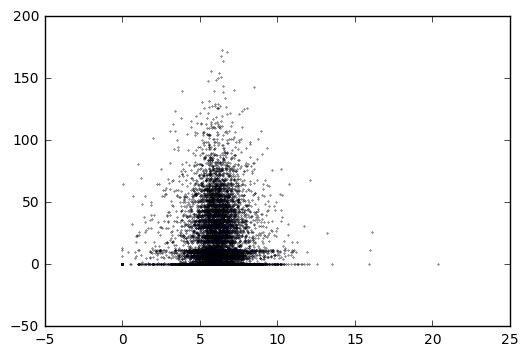

In [93]:
pos_data = pos.loc[np.array(answer_POS).astype(str)].fillna(0).values
print(pos_data.shape)

plt.figure()
plt.scatter(pos_data[:,5],ventas_dic_2012,s=.1)
plt.show()

In [82]:
print(ventas_dic_2013.shape)

(12897,)


In [94]:
filter_44_2012 = ventas['fecha'].dt.strftime('%Y-%W').values=='2012-44'

ventas_44_2012 = np.array([ventas[filter_44_2012 & (ventas['id_pos']==i)]\
['unidades'].values.sum() for i in answer_POS])

filter_44_2013 = ventas['fecha'].dt.strftime('%Y-%W').values=='2013-44'

ventas_44_2013 = np.array([ventas[filter_44_2013 & (ventas['id_pos']==i)]\
['unidades'].values.sum() for i in answer_POS])

filter_44_2014 = ventas['fecha'].dt.strftime('%Y-%W').values=='2014-44'

ventas_44_2014 = np.array([ventas[filter_44_2014 & (ventas['id_pos']==i)]\
['unidades'].values.sum() for i in answer_POS])

np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_44_2012.npy',filter_44_2012)
np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_44_2012.npy',ventas_44_2012)

np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_44_2013.npy',filter_44_2013)
np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_44_2013.npy',ventas_44_2013)

np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_44_2014.npy',filter_44_2014)
np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_44_2014.npy',ventas_44_2014)

### Load

In [ ]:
filter_44_2012 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_44_2012.npy')
ventas_44_2012 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_44_2012.npy')

filter_44_2013 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_44_2013.npy')
ventas_44_2013 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_44_2013.npy')

filter_44_2014 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_44_2014.npy')
ventas_44_2014 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_44_2014.npy')

In [95]:
filter_48_2012 = ventas['fecha'].dt.strftime('%Y-%W').values=='2012-48'

ventas_48_2012 = np.array([ventas[filter_48_2012 & (ventas['id_pos']==i)]\
['unidades'].values.sum() for i in answer_POS])

filter_49_2012 = ventas['fecha'].dt.strftime('%Y-%W').values=='2012-49'

ventas_49_2012 = np.array([ventas[filter_49_2012 & (ventas['id_pos']==i)]\
['unidades'].values.sum() for i in answer_POS])

filter_50_2012 = ventas['fecha'].dt.strftime('%Y-%W').values=='2012-50'

ventas_50_2012 = np.array([ventas[filter_50_2012 & (ventas['id_pos']==i)]\
['unidades'].values.sum() for i in answer_POS])

filter_51_2012 = ventas['fecha'].dt.strftime('%Y-%W').values=='2012-51'

ventas_51_2012 = np.array([ventas[filter_51_2012 & (ventas['id_pos']==i)]\
['unidades'].values.sum() for i in answer_POS])



np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_48_2012.npy',filter_48_2012)
np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_48_2012.npy',ventas_48_2012)

np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_49_2012.npy',filter_49_2012)
np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_49_2012.npy',ventas_49_2012)

np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_50_2012.npy',filter_50_2012)
np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_50_2012.npy',ventas_50_2012)

np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_51_2012.npy',filter_51_2012)
np.save('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_51_2012.npy',ventas_51_2012)

### Load

In [ ]:
filter_48_2012 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_48_2012.npy')
ventas_48_2012 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_48_2012.npy')
filter_49_2012 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_49_2012.npy')
ventas_49_2012 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_49_2012.npy')
filter_50_2012 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_50_2012.npy')
ventas_50_2012 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_50_2012.npy')
filter_51_2012 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/filter_51_2012.npy')
ventas_51_2012 = np.load('/home/rodo/Documentos/Challenges/ECI2019/Prediccion_ventas/Load/ventas_51_2012.npy')

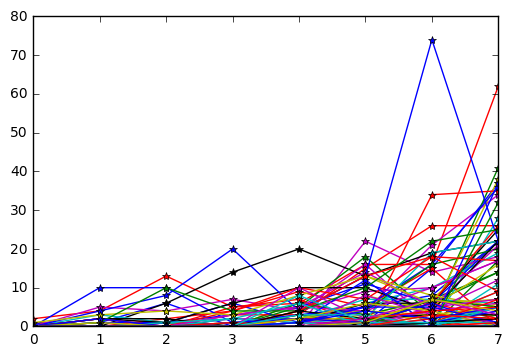

In [113]:
pos_idx = 3875
plt.figure()

for pos_idx in np.arange(0,12000,100):
    plt.plot([ventas_44_2012[pos_idx],
             ventas_45_2012[pos_idx],
             ventas_46_2012[pos_idx],
             ventas_47_2012[pos_idx],
             ventas_48_2012[pos_idx],
             ventas_49_2012[pos_idx],
             ventas_50_2012[pos_idx],
             ventas_51_2012[pos_idx]],'*-')
plt.show()